In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
x = df.drop('sales',axis=1)

In [7]:
y = df['sales']

In [8]:
train_rmse_errors = []
test_rmse_errors = []

In [9]:
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

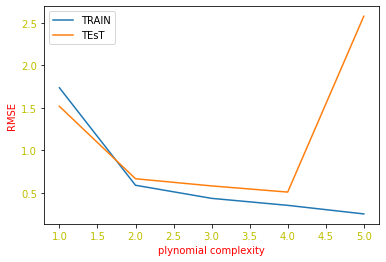

In [27]:
plt.plot(range(1,6) , train_rmse_errors[:5] , label='TRAIN')
plt.plot(range(1,6) , test_rmse_errors[:5] , label='TEsT')
plt.xlabel("plynomial complexity",c='r')
plt.ylabel("RMSE",c='r')
plt.xticks(c='y')
plt.yticks(c='y')
plt.legend()

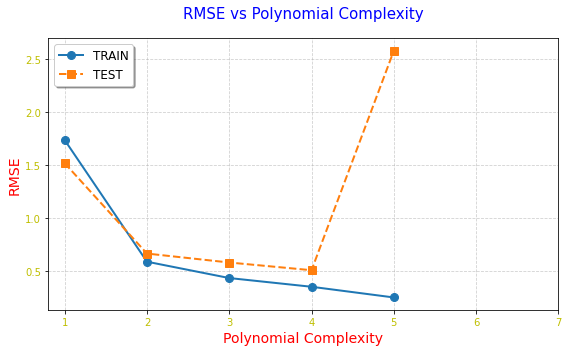

In [37]:
# Create the plot
plt.figure(figsize=(8,5))  # Adjust the figure size
plt.plot(range(1, 6), train_rmse_errors[:5], marker='o', linestyle='-', linewidth=2, markersize=8, label='TRAIN')
plt.plot(range(1, 6), test_rmse_errors[:5], marker='s', linestyle='--', linewidth=2, markersize=8, label='TEST')

# Add labels and title
plt.xlabel("Polynomial Complexity", fontsize=14, c='r')
plt.ylabel("RMSE", fontsize=14, c='r')
plt.title("RMSE vs Polynomial Complexity", fontsize=15, c='b', pad=20)

# Customize ticks
plt.xticks(range(1, 8), fontsize=10, c='y')
plt.yticks(fontsize=10, c='y')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, facecolor='white')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

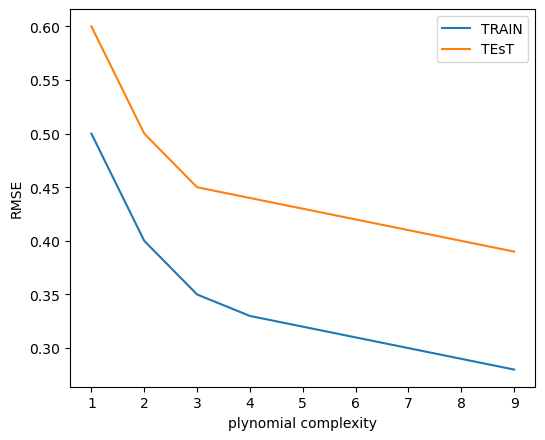

In [51]:
plt.figure(figsize=(6,5), dpi=100)
plt.plot(range(1,10) , train_rmse_errors , label='TRAIN')
plt.plot(range(1,10) , test_rmse_errors , label='TEsT')
plt.xlabel("plynomial complexity")
plt.ylabel("RMSE")
plt.legend()

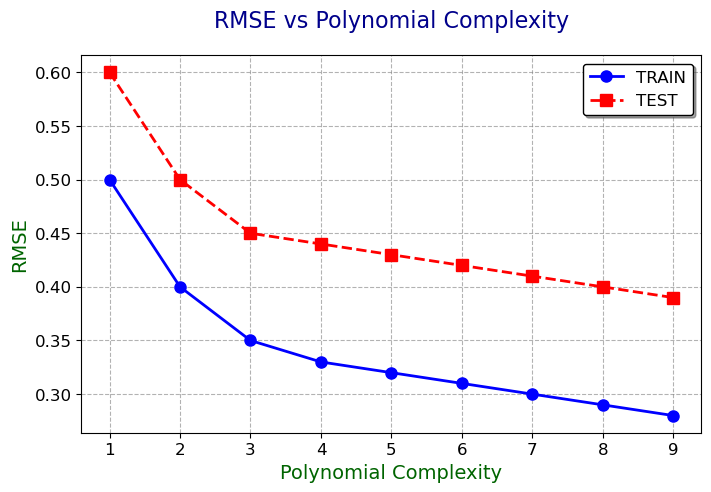

In [48]:

# Create the plot
plt.figure(figsize=(8, 5), dpi=100)  # Adjust figure size and resolution

# Plot TRAIN RMSE
plt.plot(range(1, 10), train_rmse_errors, marker='o', linestyle='-', linewidth=2, markersize=8, label='TRAIN', color='blue')

# Plot TEST RMSE
plt.plot(range(1, 10), test_rmse_errors, marker='s', linestyle='--', linewidth=2, markersize=8, label='TEST', color='red')

# Add labels and title
plt.xlabel("Polynomial Complexity", fontsize=14, color='darkgreen')
plt.ylabel("RMSE", fontsize=14, color='darkgreen')
plt.title("RMSE vs Polynomial Complexity", fontsize=16, color='darkblue', pad=20)

# Customize ticks
plt.xticks(range(1, 10), fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6, color='gray')

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True, facecolor='white', edgecolor='black')

# Adjust layout for better spacing
# plt.tight_layout()

# Show the plot
plt.show()

In [52]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [53]:
final_model = LinearRegression()

In [55]:
final_model.fit(final_poly_converter.fit_transform(x),y)

LinearRegression()

In [118]:
from joblib import dump,load

In [120]:
dump(final_model,'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [121]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [123]:
loaded_poly  = load("poly_converter.joblib")
loaded_model = load('sales_poly_model.joblib')

In [124]:
camp = [[149,22,12]]

In [126]:
camp_poly = loaded_poly.transform(camp)

In [127]:
camp_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [128]:
final_model.predict(camp_poly)

array([14.64501014])